In [1]:
import numpy as np

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

In [4]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [5]:
x.ndim

1

In [6]:
x = np.array([[1,2,3,4,5], 
              [6,7,8,9,10],
              [11,12,13,14,15]])
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [7]:
x.ndim

2

In [8]:
x = np.array([[[1,2,3,4,5], 
              [6,7,8,9,10],
              [11,12,13,14,15]],
              [[1,2,3,4,5], 
              [6,7,8,9,10],
              [11,12,13,14,15]], 
              [[1,2,3,4,5], 
              [6,7,8,9,10],
              [11,12,13,14,15]]])
x

array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]]])

In [9]:
x.ndim

3

In [10]:
from keras.datasets import mnist

Using TensorFlow backend.


In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
print(train_images.ndim)

3


In [13]:
print(train_images.shape)

(60000, 28, 28)


In [14]:
print(train_images.dtype)

uint8


In [15]:
digit = train_images[4]
print(digit.shape)

(28, 28)


In [16]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)

In [17]:
my_slice = train_images[10 : 100]
print(my_slice.shape)

(90, 28, 28)


In [18]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [19]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [20]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


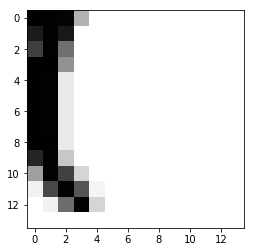

In [21]:
plt.imshow(my_slice[4], cmap=plt.cm.binary)

In [22]:
my_slice = train_images[:, 7:-7:, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


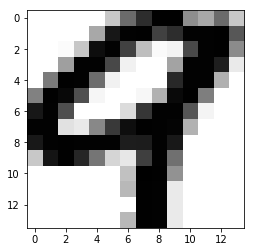

In [23]:
plt.imshow(my_slice[4], cmap=plt.cm.binary)

In [24]:
batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [25]:
batch = train_images[128:256]
print(batch.shape)

(128, 28, 28)


In [26]:
n = 1
batch = train_images[128 * n : 128 * (n + 1)]
print(batch.shape)

(128, 28, 28)


In [27]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [28]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [29]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [30]:
x = np.random.random((64, 3, 32, 10))
x.shape

(64, 3, 32, 10)

In [31]:
y = np.random.random((32, 10))
y.shape

(32, 10)

In [32]:
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [33]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [34]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [35]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [36]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0], y.shape[1])
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
train_images = train_images.reshape((60000, 28 * 28))
train_images.shape

(60000, 784)

In [39]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)